##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# 
# Adapted from: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb
# Modified by Muhammad Shalahuddin Yahya Sunarko
# 21 April 2020
# Re-released under Apache License, Version 2.0
# This license is only valid for this Notebook

# Image classification

## Import packages

In [2]:
import tensorflow as tf

tf.keras.backend.clear_session()
print("TF version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TF version: 2.1.0
Num GPUs Available:  1


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [4]:
batch_size = 128
epochs = 70
IMG_HEIGHT = 96
IMG_WIDTH = 96

In [5]:
PATH = "image_classification_dataset_96_split_trainvaltest"
train_dir = os.path.join(PATH, "train")
val_dir = os.path.join(PATH, "val")

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(val_dir)])
print("Total train:", total_train)
print("Total val:", total_val)

Total train: 3492
Total val: 998


## Data preparation

In [6]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=30)
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary')

Found 3492 images belonging to 2 classes.


In [7]:
val_image_generator = ImageDataGenerator(
    rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary')

Found 998 images belonging to 2 classes.


## Create the model

In [8]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    weights="imagenet",
    include_top=False,
    pooling="avg")

model = tf.keras.Sequential([
    base_model,
    Dense(1),
    Activation("sigmoid")
])

In [9]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])

### Model summary

View all the layers of the network using the model's `summary` method:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


### Train the model

In [11]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
model.save("masked_face_classifier.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 27 steps, validate for 7 steps
Epoch 1/70
27/27 [==============================] - 15s 572ms/step - loss: 0.7188 - binary_accuracy: 0.5999 - auc: 0.7229 - val_loss: 0.6780 - val_binary_accuracy: 0.5949 - val_auc: 0.8027
Epoch 2/70
27/27 [==============================] - 8s 310ms/step - loss: 0.3971 - binary_accuracy: 0.8065 - auc: 0.9377 - val_loss: 0.5170 - val_binary_accuracy: 0.7143 - val_auc: 0.8940
Epoch 3/70
27/27 [==============================] - 8s 312ms/step - loss: 0.2555 - binary_accuracy: 0.9001 - auc: 0.9716 - val_loss: 0.4227 - val_binary_accuracy: 0.7980 - val_auc: 0.9292
Epoch 4/70
27/27 [==============================] - 9s 320ms/step - loss: 0.1893 - binary_accuracy: 0.9355 - auc: 0.9842 - val_loss: 0.3731 - val_binary_accuracy: 0.8315 - val_auc: 0.9472
Epoch 5/70
27/27 [==============================] - 8s 307ms/step - loss: 0.1539 - binary_accuracy: 0.9444 - auc: 0.9902 - val_loss: 0.3482 - val_binary_acc

27/27 [==============================] - 10s 352ms/step - loss: 0.0089 - binary_accuracy: 0.9979 - auc: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9487 - val_auc: 0.9936
Epoch 44/70
27/27 [==============================] - 10s 358ms/step - loss: 0.0073 - binary_accuracy: 0.9988 - auc: 1.0000 - val_loss: 0.1523 - val_binary_accuracy: 0.9431 - val_auc: 0.9936
Epoch 45/70
27/27 [==============================] - 10s 359ms/step - loss: 0.0080 - binary_accuracy: 0.9985 - auc: 1.0000 - val_loss: 0.1479 - val_binary_accuracy: 0.9464 - val_auc: 0.9927
Epoch 46/70
27/27 [==============================] - 10s 369ms/step - loss: 0.0075 - binary_accuracy: 0.9988 - auc: 1.0000 - val_loss: 0.1485 - val_binary_accuracy: 0.9464 - val_auc: 0.9927
Epoch 47/70
27/27 [==============================] - 9s 348ms/step - loss: 0.0069 - binary_accuracy: 0.9991 - auc: 1.0000 - val_loss: 0.1375 - val_binary_accuracy: 0.9509 - val_auc: 0.9927
Epoch 48/70
27/27 [==============================] - 10s 362ms/

### Visualize training results

Now visualize the results after training the network.

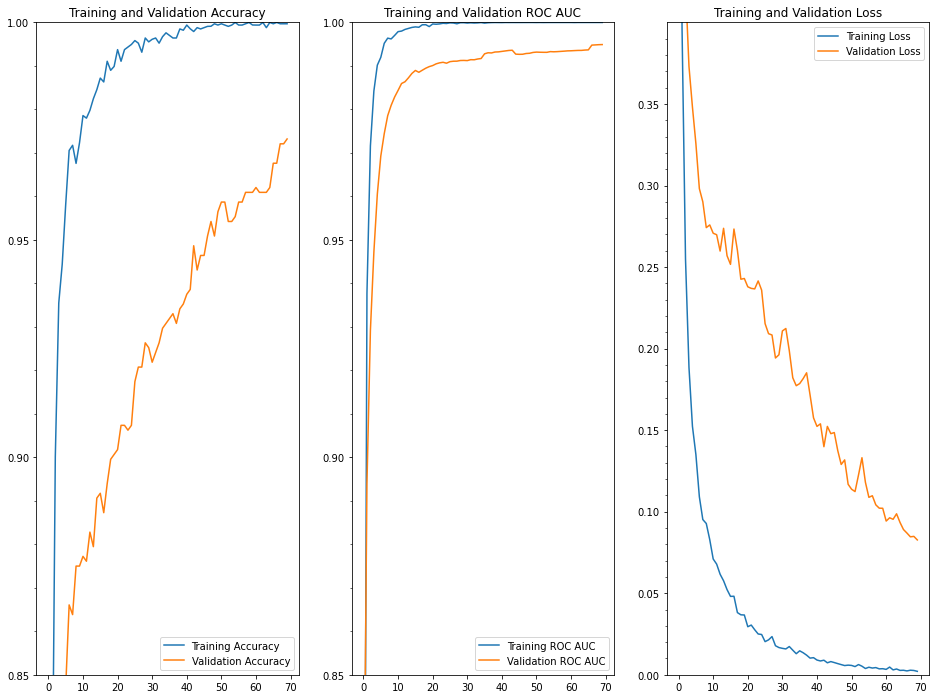

In [12]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

auc = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 12))

ax = plt.subplot(1, 3, 1)
ylim_min, ylim_max = 0.85, 1.0
major_ticks = np.arange(ylim_min, ylim_max, 0.05)
minor_ticks = np.arange(ylim_min, ylim_max, 0.01)
ax.set_ylim(ylim_min, ylim_max)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

ax = plt.subplot(1, 3, 2)
ylim_min, ylim_max = 0.85, 1.0
major_ticks = np.arange(ylim_min, ylim_max, 0.05)
minor_ticks = np.arange(ylim_min, ylim_max, 0.01)
ax.set_ylim(ylim_min, ylim_max)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.plot(epochs_range, auc, label='Training ROC AUC')
plt.plot(epochs_range, val_auc, label='Validation ROC AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation ROC AUC')

ax = plt.subplot(1, 3, 3)
ylim_min, ylim_max = 0., 0.4
major_ticks = np.arange(ylim_min, ylim_max, 0.05)
minor_ticks = np.arange(ylim_min, ylim_max, 0.01)
ax.set_ylim(ylim_min, ylim_max)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()